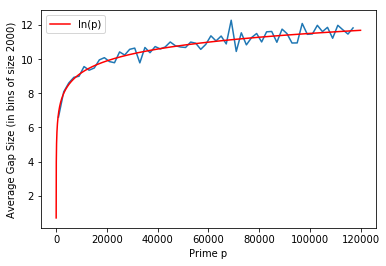

Progress:  0.99889


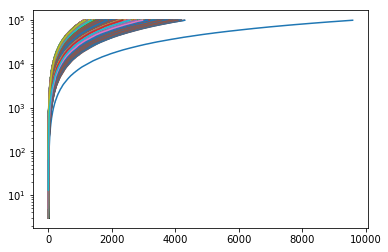

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def GetPrimeList(num):
    PrimeList = np.ones(num)
    i = 2
    while i < num:
        if PrimeList[i]:
            j = i*2
            while j < num:
                PrimeList[j] = 0
                j += i
        i += 1
    return PrimeList

def GetGapSeq(PrimeList):
    GapSeq = []
    PrimeSeq = []
    i = 2
    while i < len(PrimeList):
        if(PrimeList[i]):
            gapStart = i
            i += 1
            while i < len(PrimeList) and not PrimeList[i]:
                i += 1
            GapSeq.append(i - gapStart)
            PrimeSeq.append(gapStart)
    return (PrimeSeq, GapSeq)

def GetAveragePrimeGapList(PrimeSeq, GapSeq, n = 2000):
    avgPrimeList = []
    avgGapList = []
    i = 0
    n_start = n
    while n < PrimeSeq[-1]:
        avgPrime = 0
        avgGap = 0
        count = 0
        while PrimeSeq[i] < n:
            avgPrime += PrimeSeq[i]
            avgGap += GapSeq[i]
            count += 1
            i += 1
        if(count != 0):
            avgPrimeList.append(avgPrime/count)
            avgGapList.append(avgGap/count)
        n += n_start
    return (avgPrimeList,avgGapList)
    
numPairsToTest = 10000
end = int(1e5+1)
PairPrimeList=[[] for i in range(numPairsToTest)]
PrimeList = GetPrimeList(end+2*numPairsToTest)
PrimeSeq, GapSeq = GetGapSeq(PrimeList)
AvgPrimeSeq, AvgGapSeq = GetAveragePrimeGapList(PrimeSeq,GapSeq)
plt.plot(AvgPrimeSeq, AvgGapSeq)
plt.plot(PrimeSeq,np.log(np.array(PrimeSeq)),color='r',label='ln(p)')
plt.xlabel('Prime p')
plt.ylabel('Average Gap Size (in bins of size 2000)')
plt.legend()
plt.show()

for i in np.arange(3,end,2):
    if (i%101 == 0): print('Progress: ',i/((end-1)),end='\r')
    for j in range(numPairsToTest):
        if PrimeList[i] and PrimeList[i+2*j]:
            PairPrimeList[j].append(i)
print('')
pairDensities = np.zeros(numPairsToTest)
pairDensitiesNeighborDif = []
for i in range(numPairsToTest):
    if (i%101 == 0): print('Progress: ',i/numPairsToTest,end='\r')
    plt.plot(PairPrimeList[i],label=i)
    pairDensities[i] = (len(PairPrimeList[i]))
    if i != 0: pairDensitiesNeighborDif.append(pairDensities[i] - pairDensities[i-1])
plt.yscale('log')
plt.show()


Now we look for periodicity in the a

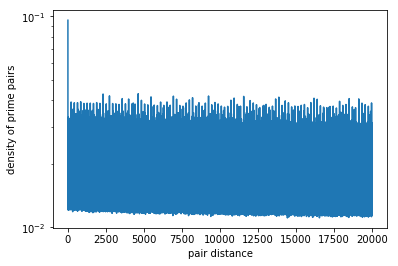

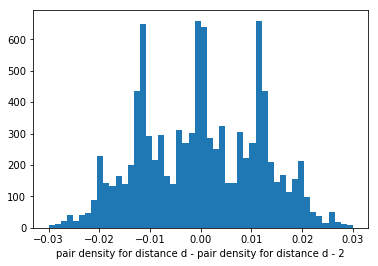

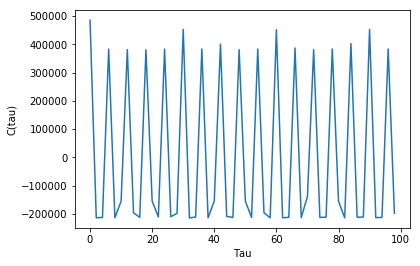

In [68]:
#PLOTS

def autocorrelation(pairDensities, tau, n_low = 0, n_high = numPairsToTest):
    n_high -= tau
    firstTerm = 0
    secondTerm = 0
    thirdTerm = 0
    for n in np.arange(n_low,n_high):
        firstTerm += pairDensities[n]*pairDensities[n+tau]
        secondTerm += pairDensities[n]
        thirdTerm += pairDensities[n+tau]
    firstTerm /= (n_high - n_low)
    secondTerm /= (n_high - n_low)
    thirdTerm /= (n_high - n_low)
    return firstTerm - secondTerm*thirdTerm


plt.plot(2*(np.arange(numPairsToTest)+1),pairDensities / end)
plt.xlabel('pair distance')
plt.ylabel('density of prime pairs')
plt.yscale('log')
plt.show()

'''
plt.hist(pairDensities / end,range=(5000/end,30000/end),bins=100)
plt.xlabel('pair densities')
plt.yscale('log')
plt.show()
'''

plt.hist(np.array(pairDensitiesNeighborDif) / end,range=(-3000/end,3000/end),bins=50)
plt.xlabel('pair density for distance d - pair density for distance d - 2')
plt.show()

tau_v = np.arange(0,50)
autocor_v = []
for tau in tau_v:
    autocor_v.append(autocorrelation(pairDensities,tau))
plt.plot(2*tau_v,autocor_v)
plt.xlabel('Tau')
plt.ylabel('C(tau)')
plt.show()